<a href="https://colab.research.google.com/github/lfr4704/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LR_LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Your Work Here

#1) Replicate lesson code

In [0]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [123]:
#example image
from IPython.display import display, Image
url='https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

In [0]:
# Specify the 'plot style' we want to use with pandas and matplotlib
plt.style.use('fivethirtyeight')

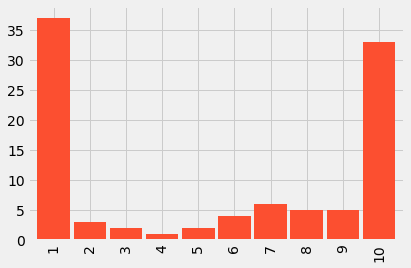

In [125]:
#create fake data

fake = pd.Series([37, 3, 2, 1, 2, 4, 6, 5, 5, 33], index=range(1,11))
fake.plot.bar(color="C1", width=0.9);

In [0]:
# a graph can also be created using value counts
fakelist2=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


In [0]:
fake2 = pd.Series(fakelist2)

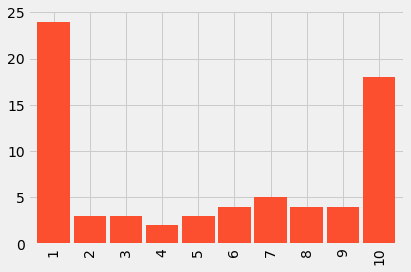

In [128]:
fake2.value_counts().sort_index().plot.bar(color="C1", width=0.9);

#Reproduce a graph with real data

In [0]:

# read the data from 538's github repo
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [130]:
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
#convert timestamp string to actual datetime objects
df['timestamp'] = pd.to_datetime(df['timestamp'])


In [132]:
#use timestamp as unique identifiers
#made a copy of dataset since inplace is going to be deprecated
df = df.set_index('timestamp').copy()
df.tail()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 23:10:05.369510,8,IMDb staff,http://www.imdb.com/title/tt6322922/ratings-im...,8.4,7.2,8,1,0,0,0,0,1,1,2,2,1,12.5,0.0,0.0,0.0,0.0,12.5,12.5,25.0,25.0,12.5
2017-08-29 23:10:05.598331,41,Top 1000 voters,http://www.imdb.com/title/tt6322922/ratings-to...,4.6,4.7,5,11,4,2,2,5,4,5,1,1,6,26.8,9.8,4.9,4.9,12.2,9.8,12.2,2.4,2.4,14.6
2017-08-29 23:10:05.794141,925,US users,http://www.imdb.com/title/tt6322922/ratings-usa,4.8,5.0,4,405,34,20,8,9,30,54,46,60,259,43.8,3.7,2.2,0.9,1.0,3.2,5.8,5.0,6.5,28.0
2017-08-29 23:10:06.022268,565,Non-US users,http://www.imdb.com/title/tt6322922/ratings-in...,6.4,6.5,7,129,11,10,8,32,47,52,37,35,204,22.8,1.9,1.8,1.4,5.7,8.3,9.2,6.5,6.2,36.1
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [133]:
#example of grabbing rows  corresponding to the last day
lastday = df['2017-08-29']
print(lastday)

                            respondents          category  ... 9_pct  10_pct
timestamp                                                  ...              
2017-08-29 00:00:02.248882         1682             Males  ...   4.9    30.9
2017-08-29 00:00:02.499363          257           Females  ...  10.1    51.0
2017-08-29 00:00:02.727204           15     Aged under 18  ...   0.0    40.0
2017-08-29 00:00:03.024270           13    Males under 18  ...   0.0    46.2
2017-08-29 00:00:03.248207            2  Females under 18  ...   0.0     0.0
...                                 ...               ...  ...   ...     ...
2017-08-29 23:10:05.369510            8        IMDb staff  ...  25.0    12.5
2017-08-29 23:10:05.598331           41   Top 1000 voters  ...   2.4    14.6
2017-08-29 23:10:05.794141          925          US users  ...   6.5    28.0
2017-08-29 23:10:06.022268          565      Non-US users  ...   6.2    36.1
2017-08-29 23:10:06.218251         2662        IMDb users  ...   5.5    33.7

In [134]:

# get the demographic breakdowns for all IMDb users on the last day
condition = lastday['category'] == 'IMDb users'
lastday_filtered = lastday[condition]
lastday_filtered.tail()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 22:30:06.423181,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:40:06.233659,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:50:06.592571,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:00:05.829558,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [135]:
# just grab the very last line (latest timestamp) of IMDb user ratings
# this should be the most up to date data from the dataset
final = lastday_filtered.tail(1)
print(final)

                            respondents    category  ... 9_pct  10_pct
timestamp                                            ...              
2017-08-29 23:10:06.218251         2662  IMDb users  ...   5.5    33.7

[1 rows x 26 columns]


In [136]:
#transpose the dataframe final above  using tranpose 
final = lastday_filtered.tail(1)
final.T

timestamp,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38
4_votes,25


In [137]:

# Grab only the percentage columns since we don't care about the raw 
# counts in making our graph
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']
final[pct_columns].T

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [138]:
#without using transpose
final[pct_columns]

,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,
2017-08-29 23:10:06.218251,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [139]:
# Reset the index so that it's numeric again
# and rename the percent column for easy access in our plotting
plot_data = final[pct_columns].T
plot_data.index = range(1,11)
plot_data.columns = ['percent']
plot_data

,percent
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


In [140]:
type(plot_data['percent'][1])

numpy.float64

Generate the figure

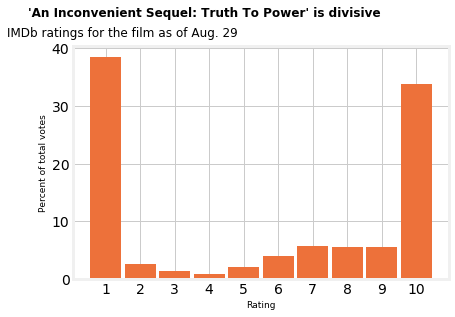

In [141]:
fig, ax = plt.subplots()

#figure background color
fig.patch.set(facecolor="white")

#set the bars
ax.bar(x=range(1,11), height=plot_data['percent'], width=0.9, color="#ED713A")

#axes background color
ax.set(facecolor="white")

#set the title and subtitles
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive",
             fontsize=12,
             x=.35,
             y=1.1,
             fontweight = 'bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42)

#set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

#fix the x and y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_xticks(range(1,11))
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));

# 2)Reproduce another example from FiveThityEight's shared data repository.

In [142]:
# a line graph similar to the image below will be replicated 
#but using the polling data in the url2
#example image
from IPython.display import display, Image
url='https://fivethirtyeight.com/wp-content/uploads/2015/07/mccann-datalab-worldcupfinal-usa.png?w=575'
example = Image(url=url, width=400)

display(example)

In [143]:
#import csv
url2 = 'https://projects.fivethirtyeight.com/polls-page/president_primary_polls.csv'
df_polls = pd.read_csv(url2)
df_polls.head(10)

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,fte_grade,sample_size,population,population_full,methodology,office_type,start_date,end_date,sponsor_candidate,internal,partisan,tracking,nationwide_batch,created_at,notes,url,stage,party,answer,candidate_id,candidate_name,pct
0,116066,63335,2020,NaN,744,Ipsos,71,Reuters,Ipsos,154.0,Ipsos,B-,545,rv,rv-d,Online,U.S. President,1/22/20,1/23/20,NaN,False,NaN,False,False,1/23/20 17:55,NaN,https://www.reuters.com/article/us-usa-electio...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,24.0
1,116066,63335,2020,NaN,744,Ipsos,71,Reuters,Ipsos,154.0,Ipsos,B-,545,rv,rv-d,Online,U.S. President,1/22/20,1/23/20,NaN,False,NaN,False,False,1/23/20 17:55,NaN,https://www.reuters.com/article/us-usa-electio...,primary,DEM,Sanders,13257,Bernard Sanders,20.0
2,116066,63335,2020,NaN,744,Ipsos,71,Reuters,Ipsos,154.0,Ipsos,B-,545,rv,rv-d,Online,U.S. President,1/22/20,1/23/20,NaN,False,NaN,False,False,1/23/20 17:55,NaN,https://www.reuters.com/article/us-usa-electio...,primary,DEM,Warren,13258,Elizabeth Warren,12.0
3,116066,63335,2020,NaN,744,Ipsos,71,Reuters,Ipsos,154.0,Ipsos,B-,545,rv,rv-d,Online,U.S. President,1/22/20,1/23/20,NaN,False,NaN,False,False,1/23/20 17:55,NaN,https://www.reuters.com/article/us-usa-electio...,primary,DEM,Bloomberg,13289,Michael Bloomberg,10.0
4,116066,63335,2020,NaN,744,Ipsos,71,Reuters,Ipsos,154.0,Ipsos,B-,545,rv,rv-d,Online,U.S. President,1/22/20,1/23/20,NaN,False,NaN,False,False,1/23/20 17:55,NaN,https://www.reuters.com/article/us-usa-electio...,primary,DEM,Buttigieg,13345,Pete Buttigieg,7.0
5,116066,63335,2020,NaN,744,Ipsos,71,Reuters,Ipsos,154.0,Ipsos,B-,545,rv,rv-d,Online,U.S. President,1/22/20,1/23/20,NaN,False,NaN,False,False,1/23/20 17:55,NaN,https://www.reuters.com/article/us-usa-electio...,primary,DEM,Klobuchar,13310,Amy Klobuchar,3.0
6,116071,63338,2020,NaN,1102,Emerson College,43,7News,Emerson College,88.0,Emerson College,A-,412,lv,lv-r,IVR/Online,U.S. President,1/21/20,1/23/20,NaN,False,NaN,False,False,1/23/20 21:01,NaN,http://emersonpolling.com/2020/01/24/national-...,primary,REP,Trump,13254,Donald Trump,91.7
7,116071,63338,2020,NaN,1102,Emerson College,43,7News,Emerson College,88.0,Emerson College,A-,412,lv,lv-r,IVR/Online,U.S. President,1/21/20,1/23/20,NaN,False,NaN,False,False,1/23/20 21:01,NaN,http://emersonpolling.com/2020/01/24/national-...,primary,REP,Weld,13351,William F. Weld,6.0
8,116071,63338,2020,NaN,1102,Emerson College,43,7News,Emerson College,88.0,Emerson College,A-,412,lv,lv-r,IVR/Online,U.S. President,1/21/20,1/23/20,NaN,False,NaN,False,False,1/23/20 21:01,NaN,http://emersonpolling.com/2020/01/24/national-...,primary,REP,Walsh,13482,Joe Walsh,2.4
9,116072,63338,2020,NaN,1102,Emerson College,43,7News,Emerson College,88.0,Emerson College,A-,497,lv,lv-d,IVR/Online,U.S. President,1/21/20,1/23/20,NaN,False,NaN,False,False,1/23/20 21:01,NaN,http://emersonpolling.com/2020/01/24/national-...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,30.0


In [144]:
df_polls.shape

(15413, 33)

In [145]:
#check what are the earliest/latest date for created_at column
df_polls['created_at'].sort_index()

0         1/23/20 17:55
1         1/23/20 17:55
2         1/23/20 17:55
3         1/23/20 17:55
4         1/23/20 17:55
              ...      
15408    12/27/18 03:50
15409    12/27/18 03:50
15410    12/27/18 03:50
15411    12/27/18 03:50
15412    12/27/18 03:50
Name: created_at, Length: 15413, dtype: object

In [146]:
#what is the datatype of created_at
type(df_polls['created_at'][1])

str

In [147]:
#change to timestamp
df_polls['created_at'] = pd.to_datetime(df_polls['created_at'])
df_polls['created_at'].head()

0   2020-01-23 17:55:00
1   2020-01-23 17:55:00
2   2020-01-23 17:55:00
3   2020-01-23 17:55:00
4   2020-01-23 17:55:00
Name: created_at, dtype: datetime64[ns]

In [0]:
#create new column with year-month-day only
df_polls['created_at_year'] = df_polls['created_at'].dt.year
df_polls['created_at_month'] = df_polls['created_at'].dt.month
df_polls['created_at_day'] = df_polls['created_at'].dt.day

In [149]:
#if the date format comes in datetime, we can also extract the day/month/year using the to_period function
#where 'D', 'M', 'Y' are inputs
#https://www.interviewqs.com/ddi_code_snippets/extract_month_year_pandas
df_polls['created_at_cleaned'] = df_polls['created_at'].dt.to_period('D')
df_polls['created_at_cleaned'].head()

0    2020-01-23
1    2020-01-23
2    2020-01-23
3    2020-01-23
4    2020-01-23
Name: created_at_cleaned, dtype: period[D]

In [151]:
#filter by candidates
condition1 = ((df_polls['candidate_name'] == "Joseph R. Biden Jr.") | (df_polls['candidate_name'] == "Bernard Sanders") | (df_polls['candidate_name'] == "Elizabeth Warren"))
df_polls_filtered = df_polls[condition1]
df_polls_filtered.head()

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,fte_grade,sample_size,population,population_full,methodology,office_type,start_date,end_date,sponsor_candidate,internal,partisan,tracking,nationwide_batch,created_at,notes,url,stage,party,answer,candidate_id,candidate_name,pct,created_at_year,created_at_month,created_at_day,created_at_cleaned
0,116066,63335,2020,NaN,744,Ipsos,71,Reuters,Ipsos,154.0,Ipsos,B-,545,rv,rv-d,Online,U.S. President,1/22/20,1/23/20,NaN,False,NaN,False,False,2020-01-23 17:55:00,NaN,https://www.reuters.com/article/us-usa-electio...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,24.0,2020,1,23,2020-01-23
1,116066,63335,2020,NaN,744,Ipsos,71,Reuters,Ipsos,154.0,Ipsos,B-,545,rv,rv-d,Online,U.S. President,1/22/20,1/23/20,NaN,False,NaN,False,False,2020-01-23 17:55:00,NaN,https://www.reuters.com/article/us-usa-electio...,primary,DEM,Sanders,13257,Bernard Sanders,20.0,2020,1,23,2020-01-23
2,116066,63335,2020,NaN,744,Ipsos,71,Reuters,Ipsos,154.0,Ipsos,B-,545,rv,rv-d,Online,U.S. President,1/22/20,1/23/20,NaN,False,NaN,False,False,2020-01-23 17:55:00,NaN,https://www.reuters.com/article/us-usa-electio...,primary,DEM,Warren,13258,Elizabeth Warren,12.0,2020,1,23,2020-01-23
9,116072,63338,2020,NaN,1102,Emerson College,43,7News,Emerson College,88.0,Emerson College,A-,497,lv,lv-d,IVR/Online,U.S. President,1/21/20,1/23/20,NaN,False,NaN,False,False,2020-01-23 21:01:00,NaN,http://emersonpolling.com/2020/01/24/national-...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,30.0,2020,1,23,2020-01-23
10,116072,63338,2020,NaN,1102,Emerson College,43,7News,Emerson College,88.0,Emerson College,A-,497,lv,lv-d,IVR/Online,U.S. President,1/21/20,1/23/20,NaN,False,NaN,False,False,2020-01-23 21:01:00,NaN,http://emersonpolling.com/2020/01/24/national-...,primary,DEM,Sanders,13257,Bernard Sanders,27.3,2020,1,23,2020-01-23


In [152]:
df_polls_filtered['pct'].dtypes

dtype('float64')

In [160]:
df_polls_filtered['candidate_name'].value_counts()

Joseph R. Biden Jr.    851
Elizabeth Warren       847
Bernard Sanders        843
Name: candidate_name, dtype: int64

In [0]:
# Line chart: age by fare and cabin class
mycolors=['crimson', 'purple', 'dodgerblue']
# Rather than specifying 3 plots you can just loop through the values.
for x in [1,2,3]:
  df_polls_filtered[df_polls_filtered['candidate_name']==x].groupby('created_at_cleaned')['pct'].plot(kind='line')

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here